In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

masa = 70
resistencia = 12.5
aceleracion = 10


constante = (resistencia/masa)

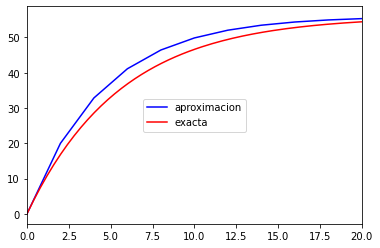

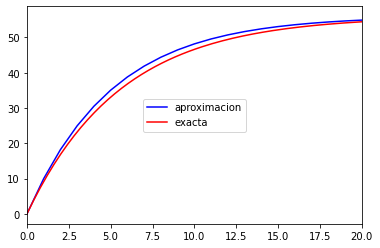

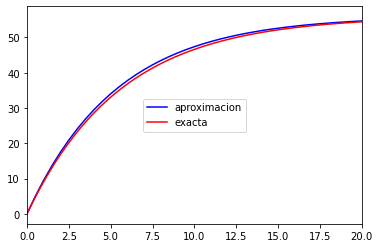

In [ ]:
x1 = np.linspace(0,30,150)
y1 = ((aceleracion*masa)/resistencia) * (1 - np.exp(-constante*x1))


deltat = [2, 1, 0.5]


for t in deltat:
    v = [0] ; deltat = float(t); tiempo = [0] ;
    for i in range(0,200):    
         v.append(v[-1] + (aceleracion - constante*v[-1]) * deltat)
         tiempo.append(tiempo[-1] + deltat)
    plt.plot(tiempo,v, 'b',label = 'aproximacion')
    plt.plot(x1,y1,'r', label = 'exacta')
    plt.legend(loc = 'center')
    plt.xlim(0,20)
    plt.show()



In [ ]:
# La parte c no supe como discretizar la solucion